In [1]:
import time
import os
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.base import clone

## Load data & pre-processing

In [2]:
file_X = "data_overfeat.npy"
X = np.load(file_X)
X = StandardScaler().fit_transform(X)

In [3]:
# Load y
file_y = "latin_labels" # or "french_labels"
y = map(lambda l:l.decode("utf-8")[0:-1], open(file_y).readlines())
y = np.array(y, dtype='unicode')

counts = Counter(y)
classes = counts.keys()
nb = counts.values()

most_frequent_classes = map(lambda (c, n):c,
                            sorted( zip(classes, nb), key=lambda (c, n):n, reverse=True))
# take 5 most frequent classes
nb_most_freq = 5
most_frequent_classes = most_frequent_classes[0:nb_most_freq]

# construct a filter of examples according to the most frequent classes
most_freq = (y == most_frequent_classes[0])
for c in most_frequent_classes[1:]:
    most_freq |= (y == c)

##Visualizations

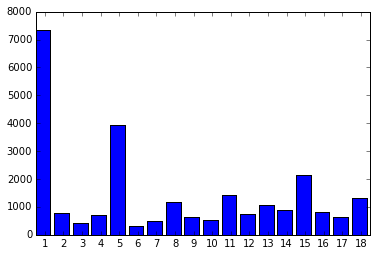

In [4]:
counts = Counter(y)
classes = counts.keys()
nb = counts.values()

indexes = np.arange(len(classes))
width = 0.5
plt.bar(indexes, nb)
plt.xticks(indexes + width, indexes + 1)
plt.legend
plt.show()

## Training

In [6]:
X_, y_ = X[most_freq], y[most_freq]

kf = StratifiedKFold(y_, n_folds=5)
#model = LinearSVC(loss='l2', dual=False, tol=0.1, C=0.0001, class_weight='auto')
model = RandomForestClassifier()
scores = []
for train_index, test_index in kf:
    X_train, y_train = X_[train_index], y_[train_index]
    X_test, y_test = X_[test_index], y_[test_index]
    
    clf = clone(model)
    
    t = time.time()
    clf.fit(X_train, y_train)
    duration = time.time() - t
    
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print(score)
    print(confusion_matrix(y_pred, y_test))
    print(classification_report(y_pred, y_test))
    print("Training duration : %fs" % (duration,))
    scores.append(score)

0.681790123457
[[ 553   20   57   40  139]
 [   2  148   11   19   13]
 [   7    9   93   21   23]
 [   8   33   35  182   63]
 [ 219   53   89  170 1233]]
             precision    recall  f1-score   support

Bourdons noirs à bande(s) jaune(s) et cul blanc        0.70      0.68      0.69       809
Guêpes Polistes        0.56      0.77      0.65       193
Mouches aux reflets métalliques        0.33      0.61      0.42       153
Syrphe ceinturé        0.42      0.57      0.48       321
 mellifère        0.84      0.70      0.76      1764

avg / total       0.72      0.68      0.69      3240

Training duration : 18.883544s
0.666769610871
[[ 535   33   60   32  150]
 [   5  132   15   24   14]
 [  10    7   73    9   16]
 [   9   33   30  189   60]
 [ 230   58  107  177 1230]]
             precision    recall  f1-score   support

Bourdons noirs à bande(s) jaune(s) et cul blanc        0.68      0.66      0.67       810
Guêpes Polistes        0.50      0.69      0.58       190
Mouches aux r

In [8]:
scores = np.array(scores)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.68179012  0.66676961  0.67964164  0.63793636  0.64524104]
0.662275755394
0.0178054322116
